# 1. Lineare Gleichungssysteme

Sympy: http://docs.sympy.org/latest/modules/solvers/solveset.html#sympy.solvers.solveset.linsolve 

Die Definition von eines Lineare Gleichungsyssteme ist:
$$ A\vec{x}=\vec{b} $$
$A$ ist der Koeffizientenmatrix, $\vec{x}$ ist der Vektor der Unbekannte $x_1 ... x_n$, und $\vec{b}$ ist der Lösungsvektor.
$\vec{x}$ ist gesucht.

In [1]:
from sympy import *
init_printing()
r,x,y,z=symbols("r x y z")

### 1.1 Lineare Glechungssysteme mit Parameter

In [2]:
A = Matrix([[5, -1, -3], [3, -2, 2], [2, 1, -4]]);
b = Matrix([10, 15, -3]);

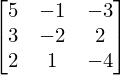

In [3]:
A

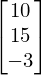

In [4]:
b

In [5]:
r = linsolve((A,b))
r

Überprüfen wir den Gleichung:

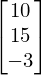

In [6]:
rr=Matrix(list(r)[0])
A*rr

In [7]:
A*rr==b

True

### 1.2 Stromstärken berechnung

Kirchhoffische Regeln:

#### I. Knotenregel
> In einem Knotenpunkt eines elektrischen Netzwerkes ist die Summe der zufließenden Ströme gleich der Summe der abfließenden Ströme. 
$$\sum^n_{k=1}I_k=0$$

#### II. Der Maschenregel
> Maschenregel: In jedem geschlossenem Stromkreis ist die Summe der Quellenspannungen gleich der Summe aller Spannungsabfälle oder die Summe aller Spannungen ist Null.
$$\sum^n_{k=1}U_k=0$$

<img src="ss.png" width="400" alt="Quellв">
<small>(Quelle: http://electroandi.ru)</small>

**Gegeben**:
$$
R_1=130\Omega; 
R_2=100\Omega;
R_3=150\Omega;
R_4=200\Omega;
R_5=80\Omega; \\
E_1=30V;
E_2=60V;
E_3=80V;\\
E_4=100V;
$$
**Gesucht**:
$$
I_1,I_2,I_3,I_4,I_5;
$$



#### 1. Knoten
Drei Knoten insgesamt, deshalb $n-1=2$ Gleichungen; Abfließende Ströme als negativ, zufließende als positiv.

$ I_3-I_1-I_4=0;$

$ I_5+I_1-I_2=0;$

#### 2. Maschen

I. $ R_1I_1+R_3I_3-R_5I_5=E_1+E_2;$

II. $ R_2I_2+R_5I_5=E_2$

III. $ R_3I_3+R_4I_4=E_3+E_4;$

In [8]:
i1, i2, i3, i4, i5=symbols("i1, i2, i3, i4, i5");

r1=130; r2=100; r3 = 150; r4 = 200; r5 = 80;
e1=30; e2=60; e3=80;  e4=100;

#i5=0.206

In [9]:
A = Matrix([[-1,0,1,-1,0], 
            [1,-1,0,0,1],
            [r1,0,r3,0,-r5],
            [0,r2,0,0,r5],
            [0,0,r3,r4,0]
           ]);
b = Matrix([0,0,e1+e3,e2,e3+e4]);

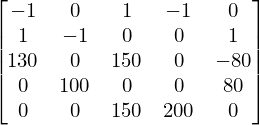

In [10]:
A

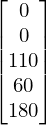

In [11]:
b

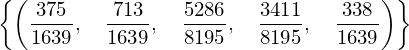

In [12]:
res=linsolve((A,b),i1,i2,i3,i4,e4)
res


Überprüfung:

In [13]:
A*Matrix(list(res)[0])==b

True